In [1]:
from keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, AveragePooling2D, Dropout
from keras.layers import UpSampling2D
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
from keras.datasets import cifar10

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pickle, os, zipfile, glob
from tqdm import tqdm
from keras import backend as K


/home/seung/.venv/py3Keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/seung/.venv/py3Keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/seung/.venv/py3Keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/seung/.venv/py3Keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/seung/.venv/py3Keras/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)

In [2]:
def basic_conv_block(input, chs, rep):
    x = input
    for i in range(rep):
        x = Conv2D(chs, 3, padding="same")(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
    return x

def create_cnn2():
    from keras.applications import MobileNet
    net = MobileNet(input_shape=(128,128,3), weights=None, include_top=False)
    # upsampling(32->128)
    input = Input((32,32,3))
    x = UpSampling2D(4)(input)
    x = net(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation="softmax")(x)

    model = Model(input, x)
    model.summary()
    return model

In [3]:
model = create_cnn2()

W0827 20:27:14.455982 139806646310656 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 20:27:14.469333 139806646310656 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 20:27:14.473693 139806646310656 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 20:27:14.490411 139806646310656 deprecation_wrapper.py:119] From /home/seung/.venv/py3Keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 128, 128, 3)       0         
_________________________________________________________________
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 3,239,114
Trainable params: 3,217,226
Non-trainable params: 21,888
_________________________________________________________________


In [10]:
import glob
vfn = glob.glob("result_supervised/*.h5")
print(vfn)
idx=2
print(vfn[idx])
fnmodel = vfn[idx]

['result_supervised/model_MobileNet_500.h5', 'result_supervised/model_MobileNet_50000.h5', 'result_supervised/model_MobileNet_10000.h5', 'result_supervised/model_MobileNet_5000.h5']
result_supervised/model_MobileNet_500.h5


In [11]:
model1 = load_model(fnmodel)
print('Loaded model..... {}'.format(fnmodel))

Loaded model..... result_supervised/model_MobileNet_500.h5


In [26]:
fn1 = fnmodel.split('/')[1]
fn1 = fn1.split('.')[0]
print(fn1)

model_MobileNet_500


In [31]:
def tsne_plot(model):
    print('tsne-plot...')
    # tsne-plot
    emb_model = Model(model.input, model.layers[-2].output)
    emb_model.summary()
    # print(model.layers[-2].output)
    # Tensor("global_average_pooling2d_1/Mean:0", shape=(?, 1024), dtype=float32)
    
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    K.image_data_format()
    y_test_true = np.ravel(y_test)
    embedding = emb_model.predict(X_test)
    proj = TSNE(n_components=2).fit_transform(embedding)
    cmp = plt.get_cmap("tab10")
    plt.figure()

    for i in tqdm(range(10)):
        select_flag = y_test_true == i
        plt_latent = proj[select_flag, :]
        plt.scatter(plt_latent[:, 0], plt_latent[:, 1], color=cmp(i), marker=".")
    fnfig = "result_supervised/embedding_{}.png".format(fn1)#n_labeled_data
    print(fnfig)
    plt.title(fn1)
    plt.savefig(fnfig)

tsne-plot...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 128, 128, 3)       0         
_________________________________________________________________
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
Total params: 3,228,864
Trainable params: 3,206,976
Non-trainable params: 21,888
_________________________________________________________________


100%|██████████| 10/10 [00:00<00:00, 156.82it/s]


result_supervised/embedding_model_MobileNet_500.png
CPU times: user 14min 14s, sys: 46.7 s, total: 15min 1s
Wall time: 7min 9s


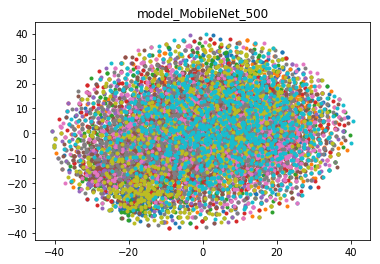

In [32]:
%%time
tsne_plot(model=model1)